## Mathematics and Statistics for Analytics - Homework Assignment 1

Authors: Raffi Sahakyan, Tigran Margarian, Sriranjan Srinivas Sribhashyam
<br>
Date: 19 Nov, 2019

<hr style="height:2px; border:none; color:#000; background-color:#000;">

# Homework 1 - Linear Regression
In this homework<br/>
-you will be implementing simple linear regression and multiple linear regression<br/>
-you will compute R2 and Adjusted R2 scores<br/>
You will use linear regression for predicting an outcome as well as determining relevant predictors.<br/>

## Scenario

Assume you are working as a consultant/analyst at a firm, you are given a dataset containing profit and expenditure information of startups. Your job is to perform simple linear regression and multiple linear regression to predict the profit of the startup and find out the most relevant predictor or combination of predictors in predicting the profit.<br/> 

## Dataset
The dataset you will be using is the "Startup Dataset". Use the following link to download the csv file of the dataset:<br/>
https://www.kaggle.com/harsh45/startups-dataset<br/>
The dataset has 50 rows and 5 columns. <br/>
The data represents the profit made by startups in 3 US states. Each row stands for a startup and has information on the expenditure of the startup (R&D spend, Administration, Marketing Spend) and state of the startup.



In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Additional stat tools and models
from scipy.stats import shapiro, norm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

#py file with defined functions
from regression_utils import *

#ignoring warnings
import warnings
warnings.filterwarnings("ignore")

#matplotlib inline for not calling plt.show
%matplotlib inline

_Download the dataset from the link provided and change the path of the dataset accordingly below._

In [2]:
dataset_path = "50_Startups.csv"
df = pd.read_csv(dataset_path)
df.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


## Data Exploration
_We can plot a histogram of the dataframe to understand the distributions of the continuous values._<br/>

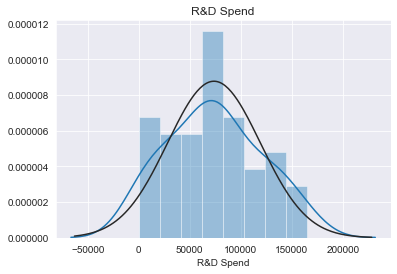

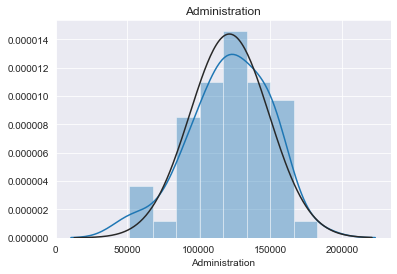

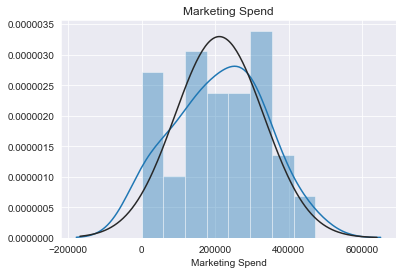

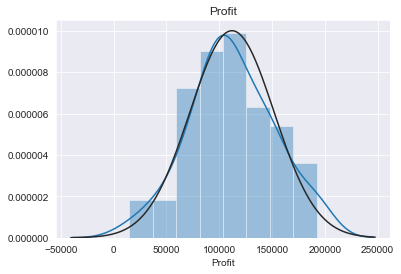

In [3]:
sns.set_style("darkgrid")
for variable in df.select_dtypes(exclude=["object"]).columns:
    ax = sns.distplot(df.select_dtypes(exclude=["object"])[variable], bins=8, fit=norm) #plotting normal distribution to visually compare
    ax.set_title(variable)
    plt.show()

#### Q1. What can you infer from the histograms? <br/>
__Ans__ - On the code above we are calling, seaborn to plot also the normal bell distribution line, to compare with actual kde of each continuous variable. If we solely rely on the visualization tools, we can claim that continuous variables are normally distributed. However, we have to take into account the limited sample size of our data. For the latter reason, we will complete Shapiro-Wilk test of normality below.   
<br>
_This is not required by the assignment, however we are doing this for our self-development purposes._

In [4]:
for variable in df.select_dtypes(exclude=["object"]).columns:
    stat, p = shapiro(df[variable])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)','\n')
    else:
        print('Sample does not look Gaussian (reject H0)')

Statistics=0.967, p=0.180
Sample looks Gaussian (fail to reject H0) 

Statistics=0.970, p=0.237
Sample looks Gaussian (fail to reject H0) 

Statistics=0.974, p=0.345
Sample looks Gaussian (fail to reject H0) 

Statistics=0.985, p=0.767
Sample looks Gaussian (fail to reject H0) 



Based on the Shapiro-Wilk normality test, we failed to reject the null hyphothesis that the continuous variables are not normally distributed. So, we can continue our analysis further with parametric models. 

_Compute the correlation matrix to get an understanding of the correlation between profit and different kinds of expenditure_.<br/>



(4.0, 0.0)

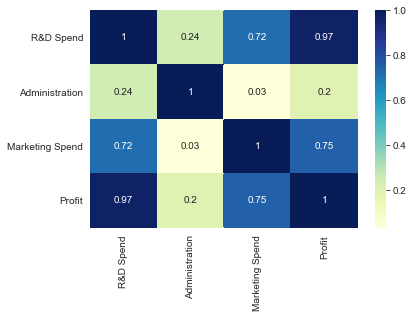

In [5]:
### WRITE CODE TO OBTAIN AND DISPLAY CORRELATION MATRIX ###
#plt.figure(figsize=(10,10))
ax = sns.heatmap(df.select_dtypes(exclude=["object"]).corr().abs().round(2),annot=True,cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [6]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


_Answer the following questions:_<br/>

#### Q2. Why is the diagonal made up of 1's in the correlation matrix?<br/>
_Ans_ - Since based on the correlation formula, the correlation of a variable with itself is the ratio of variance of the variable to the variance of the variable, that is why the correlation equals to one.<br/> <br/> 

$corr(X,X) = \frac{cov(X,X)}{\sigma _{X}\sigma _{X}}=\frac{Var(X)}{Var(X)}=1$

#### Q3. Why is the matrix symmetric along diagonal?<br/>
_Ans_ - Because the correlation of X with Y is the same as correlation of Y with X.<br> 

$corr(X,Y) = corr(Y,X)$

#### Q4. Looking at the correlation matrix, if you have to choose one predictor for a simple linear regression model with profit as the outcome, which one would you choose and why? <br/>
_Ans_ - If we would solely rely on the correlation matrix, we would choose the variable "R&D Spend", because of the high correlation with the dependent variable.


## Simple Linear Regression

Simple linear regression describes the case where we have a single predictor and a single outcome. We are interested in finding the "line of best fit" for the data. There are two constraints that guide us to the simple linear regression solution:

1. "line": characterized by a slope and intercept
2. "best fit": Minimizes the sum of squares and passes through the mean.

More formally, given some set of points (X, Y), we want to find a line of the form <br/>
$y = \beta_1 x + \beta_0$<br/>

That minimizes <br/>
$\sum(y-\hat{y})^2$<br/>

Through a bit of algebra, we find:<br/>
$\hat{\beta_1} = \dfrac{\sum((x_i-\bar{x})(y_i-\bar{y}))}{\sum(x_i - \bar{x})^2}$<br/>
$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$<br/>

Please use base python to implement simple_linear_regression() in regression_utils.py<br/>
Perform simple linear regression on the dataset with profit as the outcome. Use the predictor you chose in Q4.

In [7]:
### BELOW ENTER THE NAME OF THE COULMN YOU CHOSE AS A PREDICTOR IN Q4
x1 = df["R&D Spend"].values.reshape(-1,1) 
y1 = df["Profit"].values
b1_m, b0_m = simple_linear_regression_manually(x1, y1) #calling the manually calculated values
b1_s, b0_s = simple_linear_regression_with_sklearn(x1, y1) #calling the sklearn calculated values for self-check

Q5. Print the slope and the intercept obtained

In [8]:
print("Slope(b1) with manual formula = " + str(round(b1_m[0],3)))
print("Intercept(b0) with manual formula = " + str(round(b0_m[0],3)))
print("_"*80)
print("Slope(b1) with sklearn = " + str(round(b1_s[0],3)))
print("Intercept(b0) with sklearn = " + str(round(b0_s,3)))

Slope(b1) with manual formula = 0.854
Intercept(b0) with manual formula = 49032.899
________________________________________________________________________________
Slope(b1) with sklearn = 0.854
Intercept(b0) with sklearn = 49032.899


### Prediction

Using a model that has R&D Spend as the predictor and Profit as the outcome, make the following predictions.
(If you have already implemented the model with R&D as the predictor in the previous question, you don't need to rewrite it. Use the model to make predcitions.)

In [9]:
### CODE FOR THE MODEL AND PREDICTIONS
profit_data = np.matrix([50000, 75000, 100000, 200000]).T
b = np.array([b0_m, b1_m])
predict_manually(profit_data, b)

array([[ 91747.46768819],
       [113104.75196166],
       [134462.03623513],
       [219891.17332901]])

In [10]:
predict_with_sklearn(x1,y1,profit_data) #calling predict with sklearn to self-check

array([ 91747.46768819, 113104.75196166, 134462.03623513, 219891.17332901])

#### Q6. For a company that spends 50k on R&D Spend, what would be the profit?<br/>
_Ans_- 91747.47

#### Q7. For a company that spends 75k on R&D Spend, what would be the profit?<br/>
_Ans_- 113104.75

#### Q8. For a company that spends 100k on R&D Spend, what would be the profit?<br/>
_Ans_- 134462.04

#### Q9. For a company that spends 200k on R&D Spend, what would be the profit?<br/>
_Ans_- 219891.17


### Standardization of features

Feature standardization makes the values of each feature in the data have zero-mean and unit-variance. This method is widely used for normalization in many machine learning algorithms. The general method of calculation is to determine the distribution mean and standard deviation for each feature. Next we subtract the mean from each feature. Then we divide the values of each feature by its standard deviation.

$x'$ = ($x$ - $\bar{x}$)/$\sigma$ 

where $x$ is the original feature vector,
$\bar{x}$ is the mean of the feature vector and
$\sigma$ is its standard deviation.

This is also called Z-score Normalization. 

Note down the results after performing Z-score Normalization on R&D feature.


In [11]:
scaler = StandardScaler()
x1_standardized = scaler.fit_transform(x1)
b1_standardized_m, b0_standardized_m = simple_linear_regression_manually(x1_standardized, y1)
b1_standardized_sk, b0_standardized_sk = simple_linear_regression_with_sklearn(x1_standardized, y1)

Q10. Print the slope and the intercept obtained

In [12]:
print("Slope(b1) with manual formula = " + str(round(b1_standardized_m[0],3)))
print("Intercept(b0) with manual formula = " + str(round(b0_standardized_m[0],3)))
print("_"*80)
print("Slope(b1) with sklearn = " + str(round(b1_standardized_sk[0],3)))
print("Intercept(b0) with sklearn = " + str(round(b0_standardized_sk,3)))

Slope(b1) with manual formula = 38819.782
Intercept(b0) with manual formula = 112012.639
________________________________________________________________________________
Slope(b1) with sklearn = 38819.782
Intercept(b0) with sklearn = 112012.639


#### Q11. What are the advantages and disadvantages of using Z-score Normalization?<br/>
_Ans_ - 
The Z score normalisation has the following advantages:

* Z Score can be used to compare raw scores that are taken from different tests
* Z score takes into account both the mean value and the variability in a set of raw scores, and thus, reduces the impact of outliers on model

And the Disadvantages of Z score are:

* Z Score always assumes a normal distribution
* If the data is skewed, the distribution of the left and right of the origin line will not equal after the normalization. Consequently, the Z score normalization will not benefit the results. 


#### Q12. In this dataset, do you need to use the Z-score Normalization? Explain.<br/>
_Ans_ - We can use Z-score normalization since we checked the data for normality. If we take into account the whole dataset, we may need to use normalization, to make sure that all the feature variables are in the similiar range. Additionally, by taking into account the fact that we applied normalization test, we have minimal risk of wrong usage of Z score normalization. So, we can use the normalization in this case. 

## Multiple Linear Regression

In the big data era, it is highly unlikely that we are interested in the effect of a single variable on another. To simultaneously account for the effects of multiple variables, we use multiple regression (which accounts for the covariances between predictors).

While the algorithmic solution to multiple regression exists, it is easier to conceptualize in terms of linear algebra. The optimal $\hat{\beta}$ vector that minimizes the residual sum of squares is:

$\hat{\beta} = (X^TX)^{-1}X^Ty $


Perform multiple linear regression on the dataset with predictors as R&D Spend, Administration, Marketing Spend, State and outcome as Profit.

R&D Spend, Administration and Marketing Spend are continuous values whereas State contains discrete values. State can only take on the values New York, California or Florida. We need to perform one-hot encoding on State values for it to be processed in the model. One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. The code for performing one-hot encoding is provided below. 

Please use numpy to implement multiple_regression() in regression_utils.py and use it below.


In [13]:
x2 = df[["R&D Spend","Administration","Marketing Spend"]] 
one_hot = pd.get_dummies(df[["State"]], drop_first=True) #droping one of the dummy variables because of the multicollinearity and dummy trap
x2 = pd.concat([x2,one_hot],axis=1)
bhat = multiple_regression(x2, y1)

#### Q13. Print the value of bhat

In [14]:
print(bhat)

[ 5.01253438e+04  8.06023114e-01 -2.70043196e-02  2.69798610e-02
  1.98788793e+02 -4.18870191e+01]


In [15]:
#checking our results with sklearn
lm = LinearRegression()
model = lm.fit(x2,y1)
print(model.coef_)
print(model.intercept_)

[ 8.06023114e-01 -2.70043196e-02  2.69798610e-02  1.98788793e+02
 -4.18870191e+01]
50125.34383160419


In [16]:
#Creating Variance Inflation Factor Table
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x2.values, i) for i in range(x2.shape[1])]
vif["features"] = x2.columns
vif

,VIF Factor,features
0,8.451019,R&D Spend
1,4.950277,Administration
2,8.092278,Marketing Spend
3,2.004519,State_Florida
4,1.928836,State_New York


#### Q14. Is there a problem of multicolinearity? Explain what you can do<br/>
_Ans_ - Apparently, there is high multicoliearity between R&D Spend and Marketing Spend, based on the correlation matrix and vif scores. This happened due to the fact that data represents costs, thus if money is not spent on R&D then it is spent on other two variables. The solution would be to check the significance, to drop one of the features, build model again and evaluate.  

### Goodness of fit

A model can always make predictions. But it is important to determine how good the model is.
How do we know that our model captures the data well? When evaluating model fit, a good metric is $R^2$, which corresponds to the amount of variance explained by the model. The formula for $R^2$ is the following:

$R^2$ = $1 - \dfrac{RSS}{TSS}$<br/>
where:<br/>
$RSS = \Sigma(y - \hat{y})^2$<br/>
$TSS = \Sigma(y - \bar{y})^2$<br/>

$R^2$ is also one metric for comparing models against each other. It is intuitive to say that the model that explains more variation in the data is a better fit than one that explains less variation. Implement calculate_r2() in regression_utils.py and then run the cells below.

Consider 4 Simple Linear Regression models using the 4 predictors and compute R2 for each to compare the models.

Fill in the code for calculation of R2 score in calculate_r2 in regression_utils.py

#### R2 score for model with "R&D Spend" as predictor and "Profit" as outcome

In [17]:
x = df["R&D Spend"].values.reshape(-1,1) 
y = df["Profit"].values
b1, b0 = simple_linear_regression_manually(x, y)
b = np.array([b0, b1])
yhat = predict_manually(x, b)
r2 = calculate_r2(y, yhat)
round(r2[0],3)

0.947

#### R2 score for model with "Marketing Spend" as predictor and "Profit" as outcome

In [18]:
x = df["Marketing Spend"].values.reshape(-1,1) 
b1, b0 = simple_linear_regression_manually(x, y)
b = np.array([b0, b1])
yhat = predict_manually(x, b)
r2 = calculate_r2(y, yhat)
round(r2[0],3)

0.559

#### R2 score for model with "Administration" as predictor and "Profit" as outcome

In [19]:
x = df["Administration"].values.reshape(-1,1) 
b1, b0 = simple_linear_regression_manually(x, y)
b = np.array([b0, b1])
yhat = predict_manually(x, b)
r2 = calculate_r2(y, yhat)
round(r2[0],3)

0.04

#### R2 score for model with "State" as predictor and "Profit" as outcome

In [20]:
x = pd.get_dummies(df[["State"]],drop_first=True)
bhat = multiple_regression(x, y)
yhat = predict_manually(x, bhat)
r2 = calculate_r2(y, yhat)
round(r2,3)

0.024

Now, add features one by one and compute R2 score of different models

#### R2 score for model with "R&D Spend" as predictor and "Profit" as outcome

In [21]:
x = df["R&D Spend"].values.reshape(-1,1) 
b1, b0 = simple_linear_regression_manually(x, y)
b = np.array([b0, b1])
yhat = predict_manually(x, b)
r2 = calculate_r2(y, yhat)
round(r2[0],3)

0.947

#### R2 score for model with "R&D Spend","Marketing Spend" as predictors and "Profit" as outcome

In [22]:
x = df[["R&D Spend","Marketing Spend"]]
bhat = multiple_regression(x, y)
yhat = predict_manually(x, bhat)
r2 = calculate_r2(y, yhat)
round(r2,4)

0.9505

#### R2 score for model with "R&D Spend","Marketing Spend","Administration" as predictors and "Profit" as outcome

In [23]:
x = df[["R&D Spend","Marketing Spend", "Administration",]]
bhat = multiple_regression(x, y)
yhat = predict_manually(x, bhat)
r2 = calculate_r2(y, yhat)
round(r2,4)

0.9507

#### R2 score for model with "R&D Spend","Marketing Spend","Administration","State" as predictors and "Profit" as outcome

In [24]:
x = df[["R&D Spend","Marketing Spend", "Administration"]]
one_hot = pd.get_dummies(df[["State"]],drop_first=True)
x = pd.concat([x,one_hot],axis=1)

bhat = multiple_regression(x, y)
yhat = predict_manually(x, bhat)

r2 = calculate_r2(y,yhat)
round(r2,4)

0.9508

Wait a minute, $R^2$ is always going up as we keep adding features? 

This is one drawback of only using $R^2$ to evaluate your model. Adding predictors will always improve the predictive ability of your model, though it may not be meaningful.

That is to say, we are not necessarily interested in making a perfect prediciton of our data. If we were, we would always use all of the predictors available. Rather, we are interested in the most predictive features, in the hopes that we can create a simpler model that performs nearly as well.

This is why we consider another metric, Adjusted R2.
The adjusted R-squared increases only if the new term improves the model more than would be expected by chance.
Using Adjusted R2 score, please give the most relevant combination of predictors in determining the profit of the startup.


$AdjustedR^2$ = $1 - \dfrac{(1-R^2)(n-1)}{(n-k-1)}$<br/>
where:<br/>
n = number of samples<br/>
k = number of features

Fill in the code for calculation of adjusted R2 score in calculate_adjusted_r2 in regression_utils.py

#### Adjusted R2 score for model with "R&D Spend" as predictor and "Profit" as outcome

In [25]:
x = df["R&D Spend"].values.reshape(-1,1) 
b1, b0 = simple_linear_regression_manually(x, y)
b = np.array([b0, b1])
yhat = predict_manually(x, b)
adj_r2 = calculate_adjusted_r2(y, yhat,1)
round(adj_r2[0],3)

0.894

#### Adjusted R2 score for model with "R&D Spend","Marketing Spend" as predictors and "Profit" as outcome

In [26]:
x = df[["R&D Spend","Marketing Spend"]]
bhat = multiple_regression(x, y)
yhat = predict_manually(x, bhat)
adj_r2 = calculate_adjusted_r2(y, yhat, 2)
round(adj_r2,3)

0.899

#### Adjusted R2 score for model with "R&D Spend","Marketing Spend","Administration" as predictors and "Profit" as outcome

In [27]:
x = df[["R&D Spend","Marketing Spend", "Administration"]]
bhat = multiple_regression(x, y)
yhat = predict_manually(x, bhat)
adj_r2 = calculate_adjusted_r2(y, yhat, 3)
round(adj_r2,3)

0.898

#### Adjusted R2 score for model with "R&D Spend","Marketing Spend","Administration","State" as predictors and "Profit" as outcome


In [28]:
x = df[["R&D Spend","Marketing Spend", "Administration"]]
one_hot = pd.get_dummies(df[["State"]],drop_first=True)
x = pd.concat([x,one_hot],axis=1)


bhat = multiple_regression(x, y)
yhat = predict_manually(x, bhat)

adj_r2 = calculate_adjusted_r2(y, yhat, 5)
print(round(adj_r2,3))
check_r2(y,yhat)

0.893


True

#### Q15. Using the above Adjusted R2 scores, the combination with the highest Adjusted R2 score is associated with the model built with most relevant predictors. Note down the most relevant combination of predictors in predicting the profit of the startup.
_Ans_ - Based on the improvement in adjusted r2, we will build the model with R&D Spend and Marketing Spend. However, high collinearity between these two variables was observed earlier. Additionally, there was no significant incremental increase in adjusted r2, when Marketing Spend was added to R&D Spend, so we would advice to go with R&D Spend only, for improved model interpretability and simplicity, which may be vital in this business environment.  